### 선형회귀(diabetes) 탐색적 분석 & 선형회귀분석
- shape, 컬럼명, Dataframe, 컬럼간 상관계수 매트릭스
- 당뇨지수와 상관성이 높은 3개의 변수를 대상으로 회귀 분석/산점도 위에 선차트로 표시
   1. bmi, target을 산점도로 표현
   2. 회귀식 산점도 위에 회귀선 그리기, score() 확인

### 학습된 모델을 파일에 저장하고 불러오기
- 학습된 모델은 메모리에 생성되어 있으므로 전환을 끄면 소거됨
- 학습된 모델을 이용하여 추정하는 작업에 사용하려면 파일에 저장해야 함
- pickle 사용 직렬화 및 파일에 저장

### 다향회귀(2차함수)
- 데이터의 분포가 선형이 아닌 곡선(2차함수)인 경우

## 당뇨병에 대한 회귀분석

In [1]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()

In [11]:
from sklearn import datasets
diabetes = datasets.load_diabetes()  # 당뇨병 관련 정보
dir(diabetes)   # 보통 target에 정답이 있음
diabetes.data   # 데이터의 형태 및 값 확인
diabetes.data.shape   # ndarray의 규모 확인 (442행, 한행에는 10개 항목)
diabetes.DESCR   # age, sex, bmi, bp, s1, s2, s3, s4, s5, s6
diabetes.target.shape   # target은 442개의 1차원 배열


(442,)

## 당뇨병 데이터를 데이터프레임 형태로 가공

In [17]:
import pandas as pd
diabetes_df = pd.DataFrame(diabetes.data,
                          columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

diabetes_df['target'] = diabetes.target

diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [19]:
min(diabetes.target), max(diabetes.target)

(25.0, 346.0)

In [20]:
diabetes_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [22]:
import matplotlib.pyplot as plt

bmi = diabetes_df['bmi']
target = diabetes_df['target']

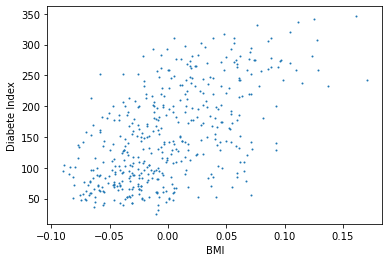

In [23]:
plt.xlabel('BMI')
plt.ylabel('Diabete Index')
bbmi, target, s=1)

In [27]:
X_train = bmi.to_numpy().reshape(-1,1)   # X_train을 2차원 데이터로 만드는 것, 기존에 데이터 프레임 방식이기 때문에
                                         # ndarray형태로 바꾸고 2차원 데이터로 reshape
X_train.shape

(442, 1)

In [28]:
linreg.fit(X_train, target)   # 학습 실행

LinearRegression()

In [29]:
linreg.coef_, linreg.intercept_

(array([949.43526038]), 152.1334841628967)

In [31]:
w = linreg.coef_            # 둘은 회귀요소의 필수
b = linreg.intercept_

In [32]:
import numpy as np
x = np.linspace(min(bmi), max(bmi), 100)   # 최소치부터 최대치까지 100개로 균등하게 쪼갬

# 회귀식 완성
y = w*x + b

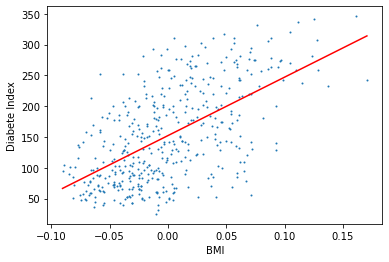

In [33]:
plt.xlabel('BMI')
plt.ylabel('Diabete Index')
plt.scatter(bmi, target, s=1)
plt.plot(x,y, 'r')
plt.show()

In [34]:
linreg.score(X_train, target)

0.3439237602253803

In [35]:
x_train = diabetes.data[:-20]
y_train = diabetes.target[:-20]
x_test = diabetes.data[-20:]
y_test = diabetes.target[-20:]

## 다중회귀 (독립변수가 다수개인 경우)  
## 종속변수 1개

In [36]:
linreg.fit(x_train, y_train)

LinearRegression()

In [38]:
linreg.coef_, linreg.intercept_

# coef_ : 가중치

(array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
        -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
         7.43519617e+02,  7.60951722e+01]),
 152.76430691633442)

In [39]:
linreg.score(x_test, y_test)

0.5850753022690575

In [40]:
linreg.predict(x_test[0, np.newaxis])

array([197.61846908])

---
## 학습된 모델을 파일에 저장하고 불러오기
- pickle 사용(dump, load)

In [41]:
import pickle

In [42]:
with open('linreg.pkl', 'wb') as fout:
    pickle.dump(linreg, fout)
print('학습된 모델 파일에 저장 성공')

학습된 모델 파일에 저장 성공


In [43]:
with open('linreg.pkl', 'rb') as fin:
    loaded_linreg = pickle.load(fin)
print('저장된 모델 로드 성공')

저장된 모델 로드 성공


In [44]:
loaded_linreg.predict(x_test[0, np.newaxis])

array([197.61846908])

## 다항회귀 (2차함수)
- y = a*x^2 + b
- x : -4 ~ +4까지 100개 실수로 구성
- y : 위의 식을 통해서 산출된 값
- 노이즈 : 정규분포, -5~5, 평균=0, std=2.5
- 데이터의 분포가 선형이 아닌 곡선(2차함수)인 경우

In [113]:
x2 = np.linspace(-4, 4, 500)   # 최소치부터 최대치까지 100개로 균등하게 쪼갬
rd = np.random.normal(0,2.5, 500)

# 회귀식 완성
y2 = 0.5 * x2**2 + 500
y2n = y2 + rd

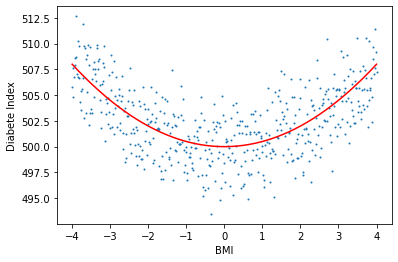

In [114]:
plt.xlabel('BMI')
plt.ylabel('Diabete Index')
plt.scatter(x2, y2n, s=1)
plt.plot(x2,y2, 'r')
plt.show()

In [115]:
# 선형 회귀 분석
from sklearn.linear_model import LinearRegression

X_train = x2[:-50].reshape(-1,1) # 50개는 남기고 나머지 450개
X_test = x2[-50].reshape(-1,1) # 나머지 50개

Y_train = y2[:-50]
Y_test = y2[-50]

In [119]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)   # 기울기와 절편 확정

LinearRegression()

In [120]:
linreg.coef_, linreg.intercept_   # 기울기와 절편 확인

(array([-0.4008016]), 502.08833431726515)

In [118]:
a = linreg.coef_[2]
b = linreg.intercept_
pred_y = a*x2 + b

IndexError: index 2 is out of bounds for axis 0 with size 1

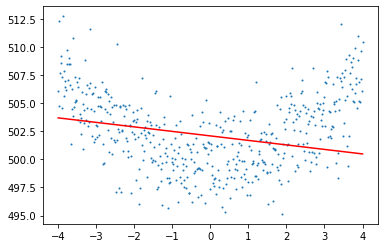

In [105]:
plt.scatter(x2, y2n, s=1)
plt.plot(x2, pred_y, 'r')

In [112]:
linreg.score(X_test, Y_test)

TypeError: Singleton array 505.1662764406569 cannot be considered a valid collection.